In [3]:
import pandas as pd

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import numpy as np

In [7]:
import statsmodels.api as sm

In [8]:
gold = pd.read_csv('GOLD.csv')

In [9]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [10]:
gold.shape

(512, 9)

In [11]:
# c=0

# y = []
# x = []
# for i in range(gold.shape[0]):
#     if gold['Pred'].notnull()[i]:
#         y.append(gold.loc[i,'Pred'])
#         x.append(gold.loc[i,'new'])

        
#         c += 1
# print(c)

In [12]:
# x = np.array(x)
# x.reshape(411,1)

In [13]:
df = gold.dropna(axis = 0)

In [14]:
x1 = df[['Price','Open','High','Low']].dropna(axis = 0)

In [15]:
# x1.drop(['Pred'], axis = 1,inplace = True)
x1

,Price,Open,High,Low
0,28060,28400,28482,28025
1,28184,28136,28382,28135
2,28119,28145,28255,28097
3,27981,28125,28192,27947
4,28007,28060,28146,27981
5,28022,27995,28100,27945
6,28019,28088,28195,27985
7,28008,28049,28157,27996
8,28109,28025,28159,28025
9,28614,28170,28638,28170


In [16]:
x1.shape

(411, 4)

In [17]:
y1 = df['Pred']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, random_state = 1)

In [19]:
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
pred = clf.predict(x_test)

In [21]:
clf.score(x_test, y_test)

1.0

In [22]:
clf.coef_

array([ 2.,  3., -1., -4.])

In [23]:
import matplotlib.pyplot as plt

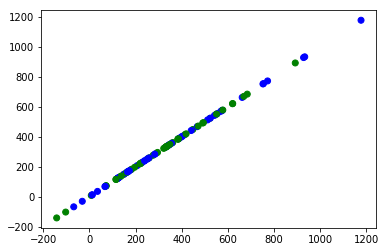

In [24]:
plt.scatter(y_test, pred,c=['g','b'])

In [25]:
gold.loc[gold.isna().any(axis=1),'Pred'] = clf.predict(gold.loc[gold.isna().any(axis=1),['Price','Open','High','Low']])

In [26]:
gold.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

In [27]:
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [28]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


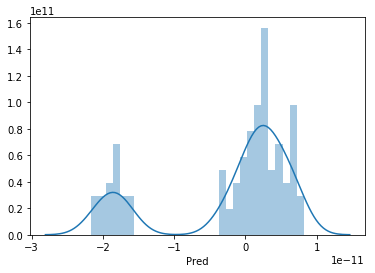

In [29]:
sns.distplot(y_test-pred, bins = 30)

In [30]:
xn = gold[['Price','Open','High','Low']]
yn = gold['new']

In [31]:
clf2 = LinearRegression()
clf2.fit(xn,yn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
clf2.coef_

array([ 1.01293825, -1.0003835 ,  1.00503772, -1.01765453])

In [33]:
clf2.intercept_

0.32815962332202275

In [34]:
tcs = pd.read_csv('Large_Cap/TCS.csv')
nifty = pd.read_csv('Nifty50/Nifty50.csv')

tcs['Date'] = tcs.Date.astype('datetime64')
nifty['Date'] = nifty.Date.astype('datetime64')

tcs.index = tcs.Date
nifty.index = nifty.Date

tcs = tcs[tcs['Series'] == 'EQ']
# tcs.reset_index(drop = True, inplace = True)
prices = pd.concat([nifty['Close'],tcs['Close Price']], axis = 1)

prices.columns = ['nifty', 'tcs']

returns = prices.pct_change()
returns.dropna(inplace =True,axis =0)
returns.head()


,nifty,tcs
Date,,
2017-05-16,0.007078,0.027081
2017-05-17,0.001419,0.010786
2017-05-18,-0.010109,0.032928
2017-05-19,-0.000164,-0.011454
2017-05-22,0.001098,0.009652


In [35]:
returns.index

DatetimeIndex(['2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19',
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-29',
               ...
               '2019-04-26', '2019-04-30', '2019-05-02', '2019-05-03',
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13'],
              dtype='datetime64[ns]', name='Date', length=493, freq=None)

In [36]:
start_date = returns.index.max() - pd.Timedelta(90, unit='D')
returns = returns[returns.index >= start_date].iloc[:,:]

In [37]:
returns

,nifty,tcs
Date,,
2019-02-12,-0.005271,-0.006922
2019-02-13,-0.003485,0.006726
2019-02-14,-0.004410,-0.010071
2019-02-15,-0.002015,-0.007287
2019-02-18,-0.007781,-0.029265
2019-02-19,-0.003440,-0.033244
2019-02-20,0.012363,0.005224
2019-02-21,0.005067,-0.000287
2019-02-22,0.000167,0.005982


In [38]:
x = returns['nifty']
y = returns['tcs']

x1 = sm.add_constant(x)

model = sm.OLS(y,x1)

beta = model.fit()
print(beta.summary())

                            OLS Regression Results                            
Dep. Variable:                    tcs   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     6.665
Date:                Fri, 26 Jul 2019   Prob (F-statistic):             0.0124
Time:                        17:08:34   Log-Likelihood:                 162.91
No. Observations:                  59   AIC:                            -321.8
Df Residuals:                      57   BIC:                            -317.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.155      0.8

In [39]:
prices.index.shape

(494,)

In [40]:
# prices['month'] = prices.index.month
prices['month'] = prices.index.strftime("%Y-%m")
prices['month']

Date
2017-05-15    2017-05
2017-05-16    2017-05
2017-05-17    2017-05
2017-05-18    2017-05
2017-05-19    2017-05
2017-05-22    2017-05
2017-05-23    2017-05
2017-05-24    2017-05
2017-05-25    2017-05
2017-05-26    2017-05
2017-05-29    2017-05
2017-05-30    2017-05
2017-05-31    2017-05
2017-06-01    2017-06
2017-06-02    2017-06
2017-06-05    2017-06
2017-06-06    2017-06
2017-06-07    2017-06
2017-06-08    2017-06
2017-06-09    2017-06
2017-06-12    2017-06
2017-06-13    2017-06
2017-06-14    2017-06
2017-06-15    2017-06
2017-06-16    2017-06
2017-06-19    2017-06
2017-06-20    2017-06
2017-06-21    2017-06
2017-06-22    2017-06
2017-06-23    2017-06
               ...   
2019-03-27    2019-03
2019-03-28    2019-03
2019-03-29    2019-03
2019-04-01    2019-04
2019-04-02    2019-04
2019-04-03    2019-04
2019-04-04    2019-04
2019-04-05    2019-04
2019-04-08    2019-04
2019-04-09    2019-04
2019-04-10    2019-04
2019-04-11    2019-04
2019-04-12    2019-04
2019-04-15    2019-04
2019-

In [41]:
month = np.zeros((25,2), dtype = float)

for i,j in enumerate (prices.month.unique()):
    temp = prices[prices.month == j]
    month[i] = temp.iloc[-1,0:2]
    
month

array([[ 9621.25,  2546.6 ],
       [ 9520.9 ,  2362.35],
       [10077.1 ,  2491.8 ],
       [ 9917.9 ,  2496.35],
       [ 9788.6 ,  2435.95],
       [10335.3 ,  2624.  ],
       [10226.55,  2637.  ],
       [10530.7 ,  2701.2 ],
       [11027.7 ,  3112.35],
       [10492.85,  3035.05],
       [10113.7 ,  2849.15],
       [10739.35,  3532.1 ],
       [10736.15,  1741.05],
       [10714.3 ,  1847.75],
       [11356.5 ,  1940.2 ],
       [11680.5 ,  2078.4 ],
       [10930.45,  2183.7 ],
       [10386.6 ,  1938.15],
       [10876.75,  1968.25],
       [10862.55,  1893.05],
       [10830.95,  2014.1 ],
       [10792.5 ,  1983.45],
       [11623.9 ,  2001.65],
       [11748.15,  2260.35],
       [11148.2 ,  2128.75]])

In [42]:
month = pd.DataFrame(month)

In [43]:
month.columns = ['nifty','tcs']
month.index = prices.month.unique()

In [44]:
month

,nifty,tcs
2017-05,9621.25,2546.60
2017-06,9520.90,2362.35
2017-07,10077.10,2491.80
2017-08,9917.90,2496.35
2017-09,9788.60,2435.95
2017-10,10335.30,2624.00
2017-11,10226.55,2637.00
2017-12,10530.70,2701.20
2018-01,11027.70,3112.35
2018-02,10492.85,3035.05


In [45]:
m_returns = month.pct_change()
m_returns = m_returns.dropna(axis = 0)

mx = m_returns['nifty']
my = m_returns['tcs']

mx1 = sm.add_constant(mx)

model2 = sm.OLS(my, mx1)

mBeta = model2.fit()
print(mBeta.summary())

                            OLS Regression Results                            
Dep. Variable:                    tcs   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.600
Date:                Fri, 26 Jul 2019   Prob (F-statistic):             0.0710
Time:                        17:08:36   Log-Likelihood:                 16.603
No. Observations:                  24   AIC:                            -29.21
Df Residuals:                      22   BIC:                            -26.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.026     -0.178      0.8

In [46]:
m_returns

,nifty,tcs
2017-06,-0.010430,-0.072351
2017-07,0.058419,0.054797
2017-08,-0.015798,0.001826
2017-09,-0.013037,-0.024195
2017-10,0.055851,0.077198
2017-11,-0.010522,0.004954
2017-12,0.029741,0.024346
2018-01,0.047195,0.152210
2018-02,-0.048501,-0.024837
2018-03,-0.036134,-0.061251


In [52]:
clf_beta = LinearRegression()
clf_beta.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
clf_beta.coef_

array([0.        , 0.76902774])

In [50]:
m_clf_beta = LinearRegression()
m_clf_beta.fit(mx1,my)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
m_clf_beta.coef_

array([0.        , 1.22328199])

## Discussion

The beta values are less than 1 and we can see that it has negative values too. The negaitive values signifies that if the nifty decrease then the TCS stock will increase by that percentage margine.
    
The daily Beta value for past 3 months for TCS company is 0.769 which signifies that if the nifty increases by 100% then stock of TCS will increase by 76%. We can see the Beta value by looking at the coefficient of nifty in regression output by OLS.
    
The monthly Beta value is 1.22 which indicates that if the nifty increases by 100% then the stocks of TCS will increase by 122%. 